<a href="https://colab.research.google.com/github/Maazuddin1/Diabetes_prediction/blob/main/Diabetes_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive modelling for Diabetes**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datascience/diabetes (1).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **DATA PREPROCESSING & EDA**

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print(df.isnull().sum())
print("shape of dataset : {",df.shape,"}")
print(df.dtypes)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
shape of dataset : { (768, 9) }
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

<Axes: >

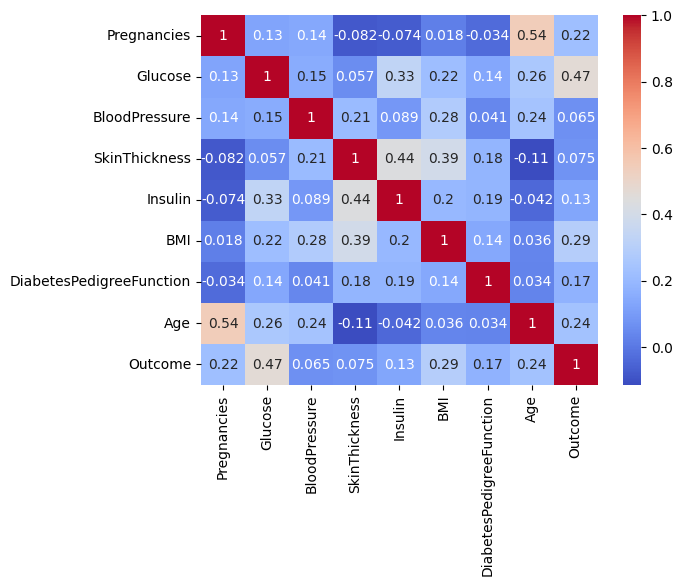

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<ipython-input-123-cdc48b108383>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot((int(length)//2), 3, j + 1)


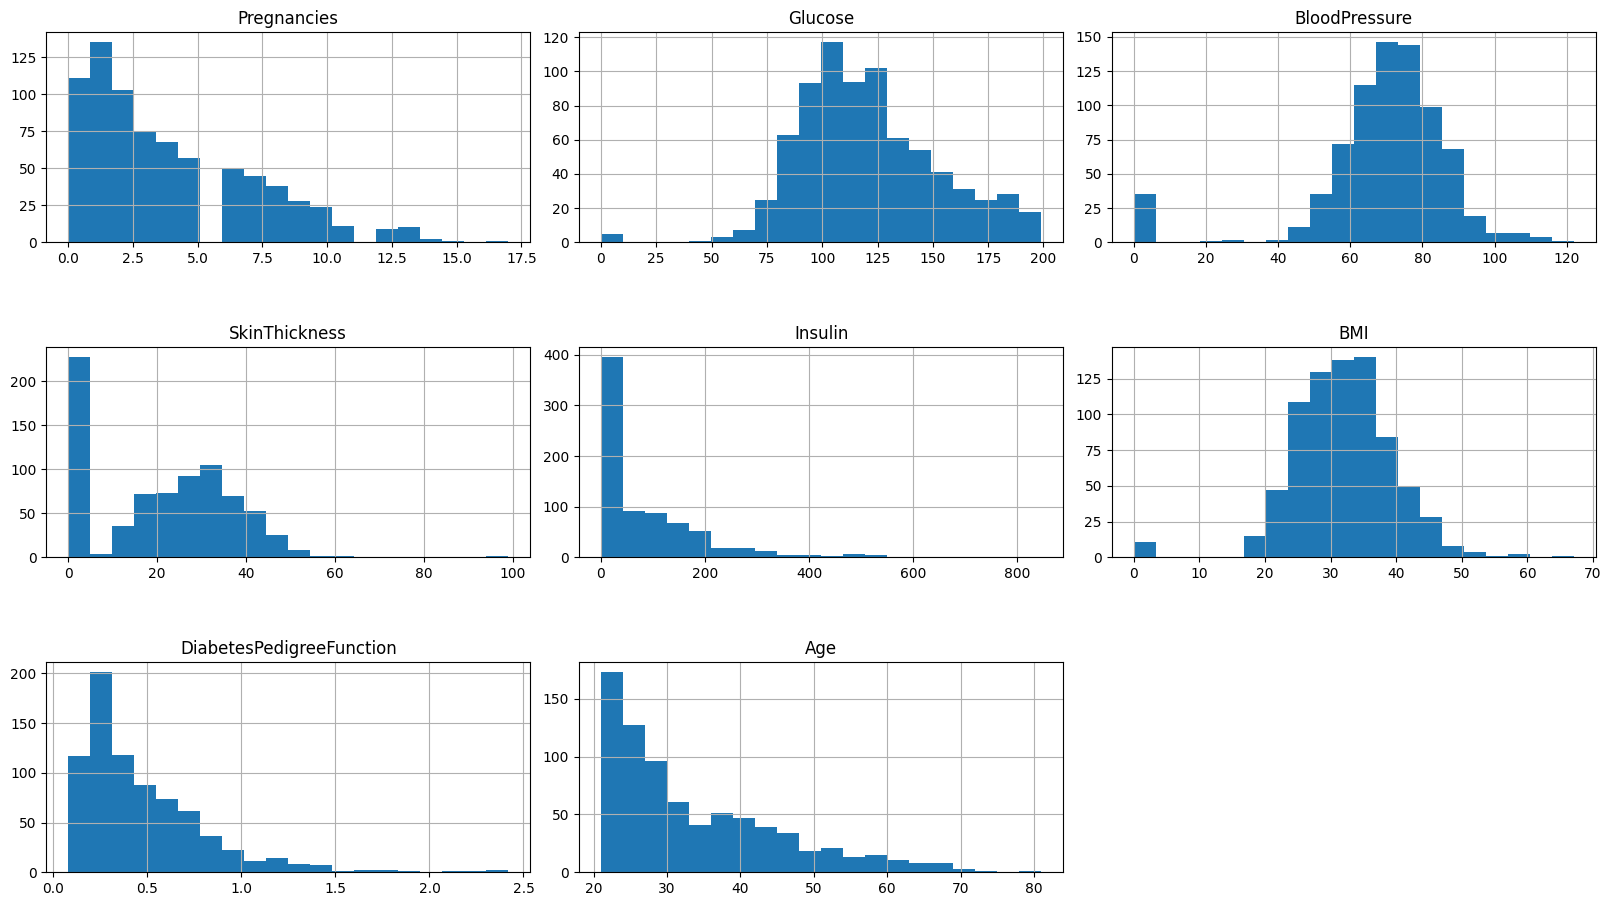

In [ ]:
import itertools
col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length =int(len(col))
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((int(length)//2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

total patients: 768
patients cured: 500
patients not cured: 268


<Axes: xlabel='Outcome', ylabel='count'>

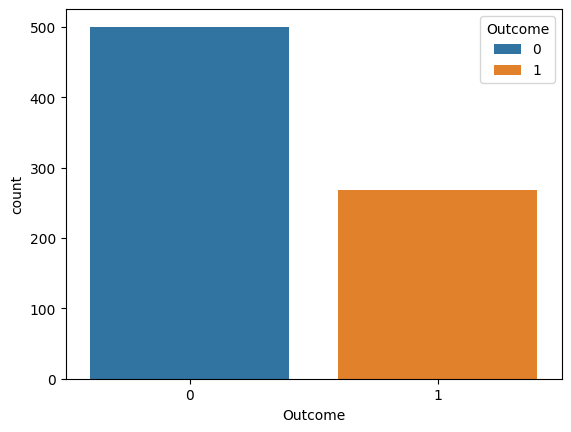

In [ ]:
print("total patients:",df.shape[0])
print("patients cured:",df['Outcome'].value_counts()[0])
print("patients not cured:",df['Outcome'].value_counts()[1])
sns.countplot(x='Outcome',data=df,hue='Outcome')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
'''mean_glucose = df['Glucose'].mean()
df['Glucose'] = df['Glucose'].replace(0,mean_glucose)
mean_bp = df['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].replace(0,mean_bp)
mean_skin = df['SkinThickness'].mean()
df['SkinThickness'] = df['SkinThickness'].replace(0,mean_skin)
mean_bmi = df['BMI'].mean()
df['BMI'] = df['BMI'].replace(0,mean_bmi)
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())'''

"mean_glucose = df['Glucose'].mean()\ndf['Glucose'] = df['Glucose'].replace(0,mean_glucose)\nmean_bp = df['BloodPressure'].mean()\ndf['BloodPressure'] = df['BloodPressure'].replace(0,mean_bp)\nmean_skin = df['SkinThickness'].mean()\ndf['SkinThickness'] = df['SkinThickness'].replace(0,mean_skin)\nmean_bmi = df['BMI'].mean()\ndf['BMI'] = df['BMI'].replace(0,mean_bmi)\ndf['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())"

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# lets split data into input and output
X = df.drop(columns='Outcome',axis=1)
Y = df['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# **data standardization**

In [ ]:
scaler= StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
# save scaled data into X,Y varibales
X = standardized_data
Y= df['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# **train test split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# **ALGORITHM SELECTION**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

**using single train_test_split data**


---

possibly biased out

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(Y_test, y_pred)
    print(f'{name}: {results[name]:.4f}')

# Print the best model
best_model_name = max(results, key=results.get)
print(f'\nBest model: {best_model_name} with accuracy: {results[best_model_name]:.4f}')

Logistic Regression: 0.7597
Decision Tree: 0.6753
Random Forest: 0.7468
Gradient Boosting: 0.7078
Support Vector Machine: 0.7273
k-Nearest Neighbors: 0.7208

Best model: Logistic Regression with accuracy: 0.7597


**using cross validation**
genralized accuracy (preferable)

In [ ]:
'''dir(cross_val_score)
help(cross_val_score)'''

'dir(cross_val_score)\nhelp(cross_val_score)'

In [ ]:
# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5)
    results[name] = scores.mean()
    print(f'{name}: {scores.mean():.4f}')

# Print the best model
best_model_name = max(results, key=results.get)
print(f'\nBest model: {best_model_name} with accuracy: {results[best_model_name]:.4f}')

Logistic Regression: 0.7709
Decision Tree: 0.7124
Random Forest: 0.7696
Gradient Boosting: 0.7566
Support Vector Machine: 0.7709
k-Nearest Neighbors: 0.7331

Best model: Support Vector Machine with accuracy: 0.7709


# **SELECTING THE BEST CLASSIFICATION ALGORITHM**
---



In [ ]:
#dir(classifier)



```
# This is formatted as code
```

**Training the model**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Gridsearch on 2 best score algo - 1)logistic regg &  2)SVM
---
**to find best hyperparameters for both algos**
---

**1)LOGISTIC REGG**


In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

logistic_reg = LogisticRegression()

grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, Y)

print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_search.best_score_)
#gcv_df=pd.DataFrame(grid_search.cv_results_)
#gcv_df[['param_C','param_penalty','mean_test_score']]

Best hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.7708853238265002


**2)SVM**

In [ ]:
classifier_svc=SVC()

param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svc = GridSearchCV(classifier_svc, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X, Y)

print("Best parameters for SVM:", grid_search_svc.best_params_)
print("Best cross-validation score for SVM:", grid_search_svc.best_score_)
grid_search_svc_df = pd.DataFrame(grid_search_svc.cv_results_)
#grid_search_svc_df[['param_C', 'param_kernel', 'mean_test_score']]

Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best cross-validation score for SVM: 0.7734827264239028


**conclusion**

In [ ]:
print("best parameter for logistic regression",grid_search.best_params_)
print("score :",grid_search.best_score_)
print("\nBest parameters for SVM:", grid_search_svc.best_params_)
print("Best cross-validation score for SVM:", grid_search_svc.best_score_)

best parameter for logistic regression {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
score : 0.7708853238265002

Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best cross-validation score for SVM: 0.7734827264239028


**Best parameters for SVM: {'C': 1, 'kernel': 'linear'}**

---


**Best cross-validation score for SVM: 0.7734827264239028**

#**Train the final SVM model with the best hyperparameters**

In [ ]:
best_svc = SVC(C=1, kernel='linear')
best_svc.fit(X_train, Y_train)

y_pred = best_svc.predict(X_test)

final_accuracy = accuracy_score(Y_test, y_pred)
print(f'Final accuracy of the SVM model: {final_accuracy:.4f}')

Final accuracy of the SVM model: 0.7727


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
#reshappe array for predicting one istance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)         #(1 row,-1 till last col)

std_data=scaler.transform(input_data_reshaped)
print(std_data)
classifier_svc.fit(X_train,Y_train)
prediction=classifier_svc.predict(std_data)
print(prediction)

if prediction[0]==0: #prediction is list so use 0th element as output
    print('person is not diabetic')
else:
    print('person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



**using svm**

**accuracy 77.27%**
